<a href="https://colab.research.google.com/github/Mariam-Yahya/Communication-Lab/blob/master/Mobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

# Amplitude Limiter محدد السعة

غير في قيمة

 Am

 ولاحظ التغير في شكل الإشارة الناتجة

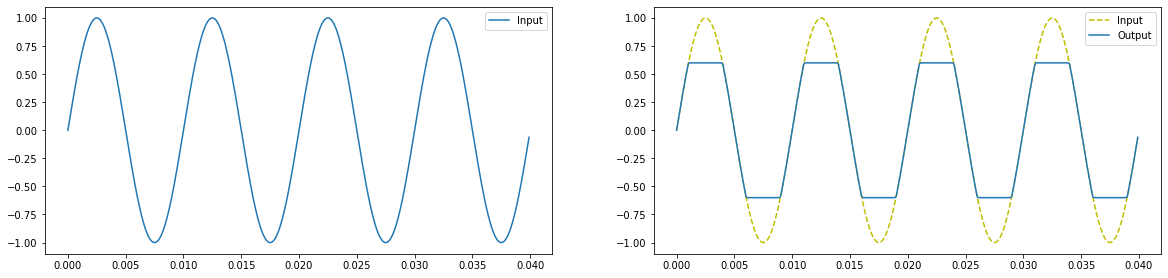

In [117]:
Am=1  # غير القيمة هنا
fm=100

Tstart=0
Tstop=0.04
Tstep=0.0001
t = np.arange(Tstart,Tstop,Tstep)

xt=Am*np.sin(2 * np.pi * fm*t)
yt=Am*np.sin(2 * np.pi * fm*t)
for i in range(len(t)):
  if -0.6< xt[i] < 0.6:
    yt[i]=xt[i]
  else:
    yt[i]=np.sign(xt[i])*0.6


f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax1.plot(t,xt,label='Input')
ax1.legend()
ax2.plot(t,xt,'y--',label='Input')
ax2.plot(t,yt,label='Output')
ax2.legend()

لإيجاد العلاقة بين الجهد على مدخل ومخرج محدد السعة

غير في قيمة جهد المدخل وسجل قيمة الجهد على المخرج، ثم ارسم العلاقة بين الجهدين
Vin=100,200,300,..., 1000 mV

In [120]:
Vin=0   # in mV

Vout=0
if -600 < Vin < 600:
   Vout=Vin
else:
   Vout=np.sign(Vin)*600

print('Vout = '+ str(Vout)+' mV')


Vout = 0 mV


# Compressor الضاغط

 الكود التالي بيبن العلاقة بين الجهد على مدخل ومخرج الضاغط (عند الطرف المرسل)

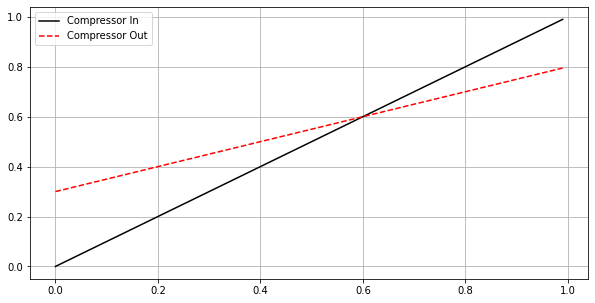

In [121]:
CompIn=np.arange(0,1,0.01)
CompOut=np.arange(0,1,0.01)
x=np.arange(0,1,0.01)
lim=0.6
for i in range(len(CompIn)):
  if CompIn[i] <= lim:
    CompOut[i]=CompIn[i]+0.5*abs(CompIn[i]-lim)
  else:
   CompOut[i]=CompIn[i]-0.5*abs(CompIn[i]-lim)
plt.figure(figsize=(10,5))
plt.plot(x,CompIn,'k',label='Compressor In')
plt.plot(x,CompOut,'r--',label='Compressor Out')
plt.legend()
plt.grid()

لإيجاد العلاقة بين الجهد على مدخل ومخرج الضاغط

غير في قيمة جهد المدخل
Vin= 100, 200, ..., 1000 mV

وارسم العلاقة بين جهد المدخل وجهد المخرج

In [123]:
Vin = 800
lim=600
if Vin < lim:
  Vout=Vin+0.5*abs(Vin-lim)
else:
  Vout=Vin-0.5*abs(Vin-lim)

print('Vout = '+ str(Vout)+' mV')

Vout = 700.0 mV


# Expander موسع

الكود التالي بيبن العلاقة بين الجهد على مدخل ومخرج الموسع (عند طرف المستقبل)

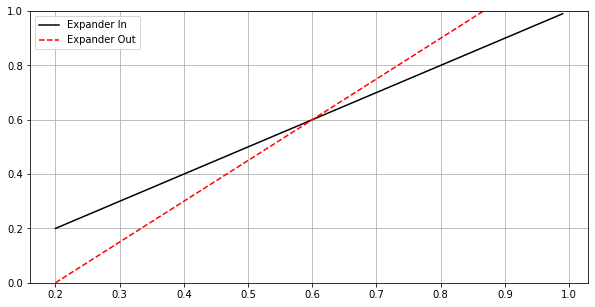

In [124]:
ExpIn=np.arange(0.2,1,0.01)
ExpOut=np.arange(0.2,1,0.01)
x=np.arange(0.2,1,0.01)
lim=0.6
for i in range(len(ExpIn)):
  if ExpIn[i] <= lim:
    ExpOut[i]=ExpIn[i]-0.5*abs(ExpIn[i]-lim)
  else:
   ExpOut[i]=ExpIn[i]+0.5*abs(ExpIn[i]-lim)
plt.figure(figsize=(10,5))
plt.plot(x,ExpIn,'k',label='Expander In')
plt.plot(x,ExpOut,'r--',label='Expander Out')
plt.ylim(0,1)
plt.legend()
plt.grid()

لإيجاد العلاقة بين الجهد على مدخل ومخرج الموسع

غير في قيمة جهد المدخل
Vin= 100, 200, ..., 1000 mV

وارسم العلاقة بين جهد المدخل وجهد المخرج

In [126]:
Vin = 300
lim=600
if Vin < 600:
 Vout=Vin-0.5*abs(Vin-lim)
else:
 Vout=Vin+0.5*abs(Vin-lim)
print(Vout)

150.0


# Pre-emphasis تعزيز الإشارة

الكود التالي يرسم أو 3.5 ثانية من تسجيل صوتي قبل تعزيز الإشارة ويمكنم سماع التسجيل

fatal: destination path 'Communication-Lab' already exists and is not an empty directory.


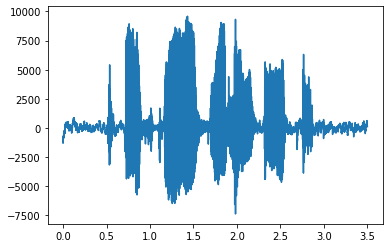

In [129]:
import scipy.io.wavfile
from IPython.display import Audio
!git clone https://github.com/Mariam-Yahya/Communication-Lab.git
sample_rate, Audiosignal = scipy.io.wavfile.read('./Communication-Lab/OSR_us_000_0010_8k.wav') 
Audiosignal = Audiosignal[0:int(3.5 * sample_rate)]  # Keep the first 3.5 seconds
Tstart=0
Tstop=3.5
Tstep=3.5/len(Audiosignal)
t = np.arange(Tstart,Tstop,Tstep)
plt.plot(t,Audiosignal)
# Generate a player for mono sound
Audio(Audiosignal,rate=sample_rate)

الكود التالي يعزز الإشارة المدخلة (التسجيل الصوتي) ويرسم أول 3.5 ثانية من التسجيل. يمكنم سماع التسجيل للإشارة المعززة

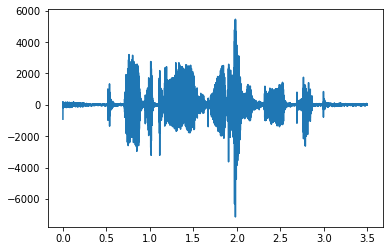

In [130]:
pre_emphasis=0.95
emphasized_signal = np.append(Audiosignal[0], Audiosignal[1:] - pre_emphasis * Audiosignal[:-1])
plt.plot(t,emphasized_signal)

Audio(emphasized_signal,rate=sample_rate)

 الكود التالي يوضح مبدأ عمل دائرة التعزيز. غير تردد إشارة المدخل وسجل مقدار الجهد على المخرج

ارسم العلاقة بين تردد المدخل وجهد المخرج

Vout =0.20052277143494657


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


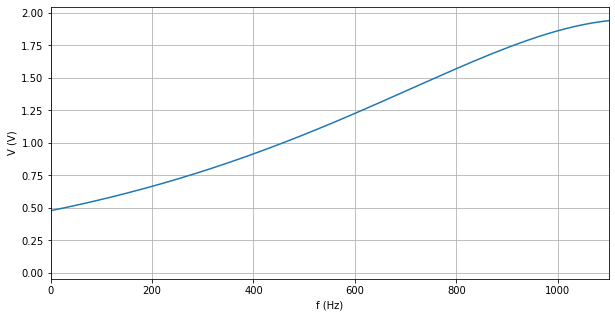

In [132]:
Input=200
i=int(Input/1100*512)
w, h=scipy.signal.freqz([1, -0.95],a=1)

plt.figure(figsize=(10,5))
plt.plot(1000*np.log((w+0.01)),h)
plt.grid()
plt.xlabel('f (Hz)')
plt.ylabel('V (V)')
plt.xlim(0,1100)
print('Vout =' +str(np.real(h[i])))

# De-emphasis  إزالة التعزيز

 الكود التالي يوضح مبدأ عمل دائرة إزالة التعزيز. غير تردد إشارة المدخل وسجل مقدار الجهد على المخرج

ارسم العلاقة بين تردد المدخل وجهد المخرج

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Vout =1.7994772285650535


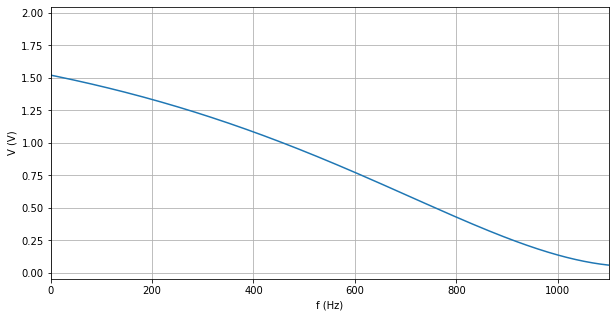

In [133]:
Input=200
i=int(Input/1100*512)
w, h=scipy.signal.freqz([1, 0.95],a=1)

plt.figure(figsize=(10,5))
plt.plot(1000*np.log((w+0.01)),h)
plt.grid()
plt.xlabel('f (Hz)')
plt.ylabel('V (V)')
plt.xlim(0,1100)
print('Vout =' +str(np.real(h[i])))

# Phase Locked Loop (PLL) دائرة إقفال زاوية الطور

مقارنة إشارات مختلفة التردد
xt1=0.0 xt2=0.0
xt1=-2.4492935982947064e-16 xt2=0.5877852522924736
xt1=-4.898587196589413e-16 xt2=0.951056516295154
 مقارنة إشارات متساوية التردد لكن مختلفة في زاوية الطور
xt1=0.0 xt3=0.49999999999999994
xt1=-2.4492935982947064e-16 xt3=0.5
xt1=-4.898587196589413e-16 xt3=0.49999999999999906


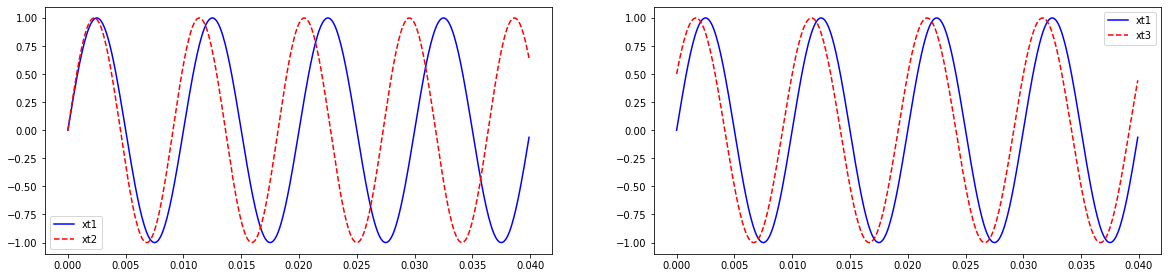

In [134]:
Am=1
fm=100
fm2=110

Tstart=0
Tstop=4/fm
Tstep=0.01/fm
t = np.arange(Tstart,Tstop,Tstep)

xt1=Am*np.sin(2 * np.pi * fm*t)
xt2=Am*np.sin(2 * np.pi * fm2*t)
xt3=Am*np.sin(2 * np.pi * fm*t+np.pi/6)

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax1.plot(t,xt1,'b',label='xt1')
ax1.plot(t, xt2,'r--',label='xt2')
ax1.legend()
ax2.plot(t,xt1,'b',label='xt1')
ax2.plot(t,xt3,'r--',label='xt3')
ax2.legend()

print('مقارنة إشارات مختلفة التردد')
print('xt1='+str(xt1[int(0)]), 'xt2='+str(xt2[int(0)]))
print('xt1='+str(xt1[int(fm)]), 'xt2='+str(xt2[int(fm)]))
print('xt1='+str(xt1[int(2*fm)]), 'xt2='+str(xt2[int(2*fm)]))

print(' مقارنة إشارات متساوية التردد لكن مختلفة في زاوية الطور')
print('xt1='+str(xt1[int(0)]), 'xt3='+str(xt3[int(0)]))
print('xt1='+str(xt1[int(fm)]), 'xt3='+str(xt3[int(fm)]))
print('xt1='+str(xt1[int(2*fm)]), 'xt3='+str(xt3[int(2*fm)]))

5.877852522924738


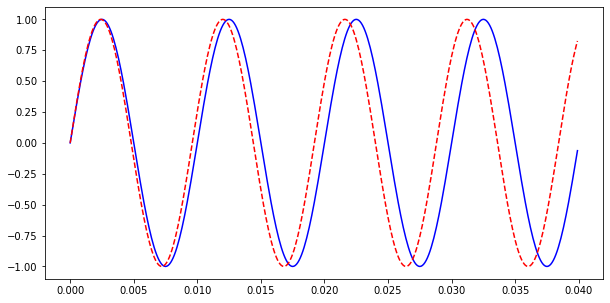

In [135]:
dV= abs(xt1[int(fm)]-xt2[int(fm)])
f=10*dV
print(f)
xt1=Am*np.sin(2 * np.pi * fm*t)
xt_vco=Am*np.sin(2 * np.pi * (fm2-f) *t)
plt.figure(figsize=(10,5))
plt.plot(t,xt1,'b' ,t, xt_vco,'r--')

